In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

survey = pd.read_csv('masculinity.csv')

In [2]:
print(survey)

      Unnamed: 0     StartDate       EndDate               q0001  \
0              1  5/10/18 4:01  5/10/18 4:06  Somewhat masculine   
1              2  5/10/18 6:30  5/10/18 6:53  Somewhat masculine   
2              3  5/10/18 7:02  5/10/18 7:09      Very masculine   
3              4  5/10/18 7:27  5/10/18 7:31      Very masculine   
4              5  5/10/18 7:35  5/10/18 7:42      Very masculine   
...          ...           ...           ...                 ...   
1184        1185  5/19/18 7:50  5/19/18 8:00  Somewhat masculine   
1185        1186  5/19/18 7:52  5/19/18 8:03  Somewhat masculine   
1186        1187  5/19/18 7:58  5/19/18 8:04      Very masculine   
1187        1188  5/19/18 8:52  5/19/18 8:59  Somewhat masculine   
1188        1189  5/19/18 8:56  5/19/18 9:02  Somewhat masculine   

                     q0002                  q0004_0001  \
0       Somewhat important                Not selected   
1       Somewhat important  Father or father figure(s)   
2        

In [3]:
col_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
for col in col_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
survey['q0001'] = survey['q0001'].map({ 'Very masculine' : 0 , 'Somewhat masculine' : 1 , 'Not very masculine' : 2 , 'Not at all masculine' : 3 })

In [4]:
#print(survey['q0007_0001'].value_counts())
#print(survey.info)
survey['q0007_0001'].dropna()
features = survey.dropna(subset= ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"])
#print(survey['q0007_0001'].isna().any())
print(survey['q0007_0001'].head)

<bound method NDFrame.head of 0       4.0
1       2.0
2       3.0
3       2.0
4       3.0
       ... 
1184    3.0
1185    3.0
1186    4.0
1187    1.0
1188    2.0
Name: q0007_0001, Length: 1189, dtype: float64>


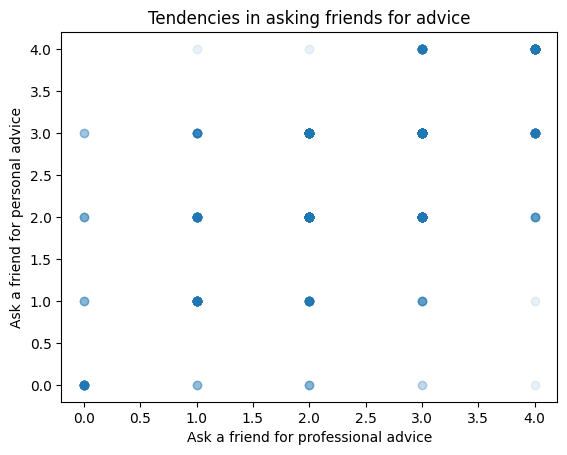

In [5]:
from matplotlib import pyplot as plt

plt.scatter(survey['q0007_0001'], survey['q0007_0002'], alpha=0.1)
plt.xlabel('Ask a friend for professional advice')
plt.ylabel('Ask a friend for personal advice')
plt.title('Tendencies in asking friends for advice')
plt.show()

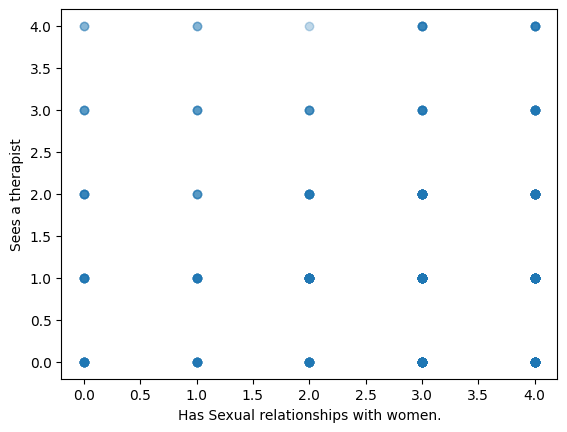

In [6]:
plt.scatter(survey['q0007_0006'], survey['q0007_0010'], alpha=0.1)
plt.xlabel('Has Sexual relationships with women.')
plt.ylabel('Sees a therapist')
plt.show()


In [7]:
classifier = KMeans(n_clusters = 2, init = 'k-means++')
classifier.fit(features[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"]])
print(classifier.cluster_centers_)

C:\Users\Vapou\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[1.87830688 1.84391534 0.85185185 1.72486772 0.57142857 2.64021164
  1.97089947]
 [2.84548105 2.81632653 2.84110787 2.39941691 0.69387755 3.06997085
  2.90087464]]


In [8]:
cluster_zero_indices = []
cluster_one_indices = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
print(cluster_one_indices)

[0, 2, 3, 5, 8, 11, 13, 15, 16, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 43, 44, 45, 46, 47, 48, 50, 56, 59, 60, 61, 64, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 80, 81, 83, 85, 91, 93, 96, 99, 100, 102, 103, 104, 105, 108, 110, 111, 112, 114, 115, 120, 121, 122, 124, 125, 126, 127, 133, 135, 136, 137, 138, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 177, 182, 183, 185, 186, 188, 190, 191, 192, 193, 194, 197, 200, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 232, 234, 235, 238, 239, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 257, 258, 259, 262, 265, 266, 267, 268, 269, 270, 271, 273, 274, 276, 277, 278, 279, 280, 282, 285, 287, 289, 290, 292, 293, 294, 295, 298, 302, 303, 304, 306, 307, 308, 309, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 326, 3

In [9]:
cluster_zero_df= features.iloc[cluster_zero_indices]
cluster_one_df= features.iloc[cluster_one_indices]

In [11]:
print(cluster_one_df['q0007_0002'].value_counts())

q0007_0002
3.0    370
2.0    186
4.0    107
1.0     22
0.0      1
Name: count, dtype: int64
